In [422]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint, solve_ivp
from perlinnoise import *
from tqdm.notebook import tqdm as t
from scipy.interpolate import interp1d

In [423]:
#Ode integration version

In [736]:
def h(x):
    "0 <= x <= 1"
    return np.exp(-100*(x-0.2)**2) + 5*np.exp(-100*(x-0.8)**2)

def h_prime(x):
    return -100*2*(x-0.2)* np.exp(-100*(x-0.2)**2) + -500*2*(x-0.8)*np.exp(-100*(x-0.8)**2)

In [737]:
x_0 = 0
dx = 1e-4
N = round(1/dx)
u_0 = 5
d_0 = 5
K = u_0*d_0
g = 9.8
gK = g*K
print('fr_0 {0}'.format(np.sqrt(u_0**2/(g*d_0))))

fr_0 0.7142857142857143


In [738]:
xs = np.arange(0, 1, 1e-3)

def F(x, u, hp = h_prime):
    RHS = -g*hp(x)
    div = (u-gK/u**2)
    return RHS/div

res = solve_ivp(F, (0, 1), [u_0], t_eval = xs, method = 'DOP853')

us = res.y[0]
ds = K/us

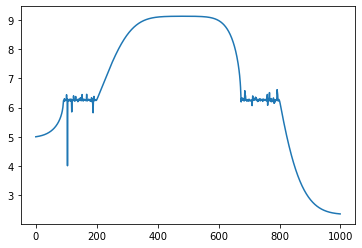

In [742]:
plt.plot(us)

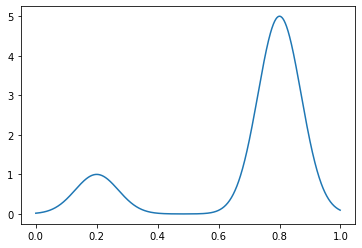

In [747]:
plt.plot(xs, h(xs))

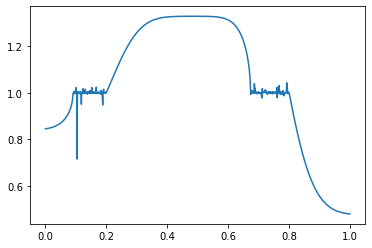

In [743]:
plt.plot(xs, np.sqrt(np.sqrt(us**2/(g*ds))))

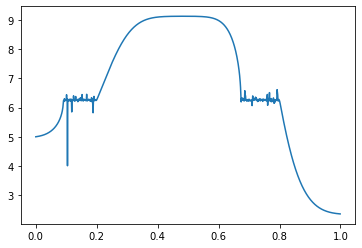

In [744]:
plt.plot(xs,us)

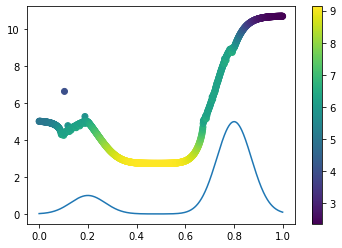

In [745]:
plt.scatter(xs,ds+h(xs), c = us)
plt.plot(xs,h(xs))
plt.colorbar()

In [746]:
#Numerical integration

In [708]:
from scipy.optimize import root_scalar

In [709]:
c = gK/u_0 + u_0**2/2 + g*h(0)

In [710]:
def f(z, x):
    return z**3/2 + (g*h(x)-c)*z + gK

In [711]:
def discriminant(x):
    """The discriminant of the depressed cubic t^{3}+pt+q is -(4p^{3}+27q^{2})"""
    p = 2*(g*h(x)-c)
    q = 2*gK
    return -(4*p**3 + 27*q**2)

In [712]:
import sympy as sp
x, a, b = sp.symbols('x a b')
solve_depressed_cubic1 = sp.lambdify((a,b),sp.solve(x**3 + a*x+b, x)[0])
solve_depressed_cubic2 = sp.lambdify((a,b),sp.solve(x**3 + a*x+b, x)[1])
solve_depressed_cubic3 = sp.lambdify((a,b),sp.solve(x**3 + a*x+b, x)[2])

In [713]:
sol

NameError: name 'sol' is not defined

In [ ]:
e1 = sp.solve(x**3 + a*x+b, x)[0]
e2 = sp.solve(x**3 + a*x+b, x)[1]
e3 = sp.solve(x**3 + a*x+b, x)[2]

In [714]:
M = np.zeros((3,100), dtype = np.complex64)
for x,z in t(enumerate(np.linspace(0,1,100))):
    
    M[0,x] = e1.subs(a,2*((g*h(z)-c))).subs(b, 2*gK).n()
    M[1,x] = e2.subs(a,2*((g*h(z)-c))).subs(b, 2*gK).n()
    M[2,x] = e3.subs(a,2*((g*h(z)-c))).subs(b, 2*gK).n()

0it [00:00, ?it/s]

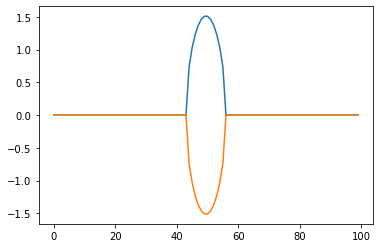

In [715]:
plt.plot(M[1].imag)
plt.plot(M[2].imag)

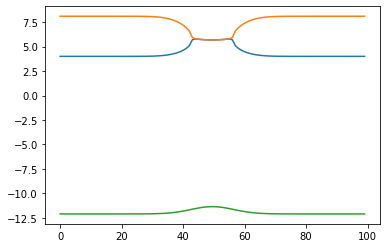

In [716]:
plt.plot(M[1].real)
plt.plot(M[2].real)
plt.plot(M[0].real)


In [620]:
discriminant(0)

1777248.0

In [619]:
2*gK

392.0

In [617]:
2*((g*h(0)-c))

-114.0

8.09950493836208 + 1.836e-15*I

In [557]:
from scipy.integrate import quad

In [527]:
quad(f, 0, 1)

TypeError: f() missing 1 required positional argument: 'x'

In [528]:
scipy

NameError: name 'scipy' is not defined

In [529]:
def h(x):
    "0 <= x <= 1"
    return 2 * np.exp(-100*(x-0.2)**2) - 2 * np.exp(-100*(x-0.8)**2) + 2

def h_prime(x):
    return 2*(200)*(x-0.2)*np.exp(-100*(x-0.2)**2) -2*200*(x-0.8)*np.exp(-100*(x-0.8)**2)

In [207]:
# f = 2 * sp.exp(-100*(x-0.3)**2) - 2 * sp.exp(-100*(x-0.4)**2) + 2

# sp.diff(f,x)

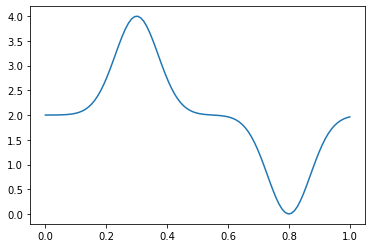

In [209]:
plt.plot(np.linspace(0,1, 100), h(np.linspace(0,1, 100)))
#plt.plot(np.linspace(0,1, 100), h_prime(np.linspace(0,1, 100)))

In [187]:
res = solve_ivp(F, (0, 1), [1], t_eval = xs)

In [188]:
us = res.y[0]
ds = K/us

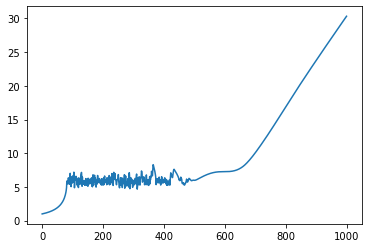

In [189]:
plt.plot(us)

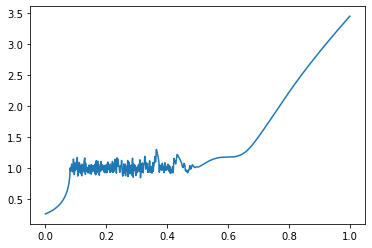

In [190]:
plt.plot(xs, np.sqrt(np.sqrt(us**2/(g*ds))))

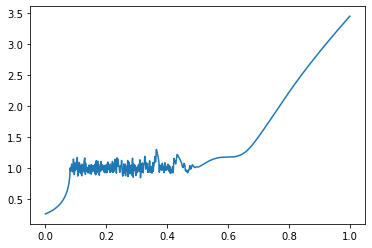

In [191]:
plt.plot(xs, np.sqrt(np.sqrt(us**2/(g*ds))))

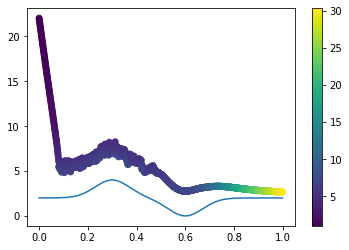

In [192]:
plt.scatter(xs,ds+h(xs), c = us)
plt.plot(xs,h(xs))
plt.colorbar()

In [776]:
# import pickle
# f= pickle.load(open('data.pickle', 'rb'))
    

# plt.scatter(f['lat'].flatten(), f['lon'].flatten(),c=f['elev'])
# plt.axis('equal')

# M = f['elev']

# from scipy.signal imp

# from scipy.ndimage import gaussian_filter

Plotting: Subcritical

In [809]:
def h(x):
    "0 <= x <= 1"
    return np.exp(-100*(x-0.4)**2)
def h_prime(x):
    return -100*2*(x-0.4)* np.exp(-100*(x-0.4)**2)

In [938]:
us = []
frs = []

for u_0 in [3, 4, 10, 11]:
    x_0 = 0
    dx = 1e-4
    N = round(1/dx)
    #_0 = 2
    d_0 = 5
    K = u_0*d_0
    g = 9.8
    gK = g*K
    print('fr_0 {0}'.format(np.sqrt(u_0**2/(g*d_0))))
    xs = np.arange(0, 1, 1e-3)

    def F(x, u, hp = h_prime):
        RHS = -g*hp(x)
        div = (u-gK/u**2)
        return RHS/div

    res = solve_ivp(F, (0, 1), [u_0], t_eval = xs, method = 'DOP853')

    us.append(res.y[0])
    uss = res.y[0]
    dss = K/uss
    frs.append(np.sqrt(np.sqrt(uss**2/(g*dss))))

fr_0 0.4285714285714286
fr_0 0.5714285714285714
fr_0 1.4285714285714286
fr_0 1.5714285714285714


In [939]:
plt.style.use('plot_style-coolwarm.txt')

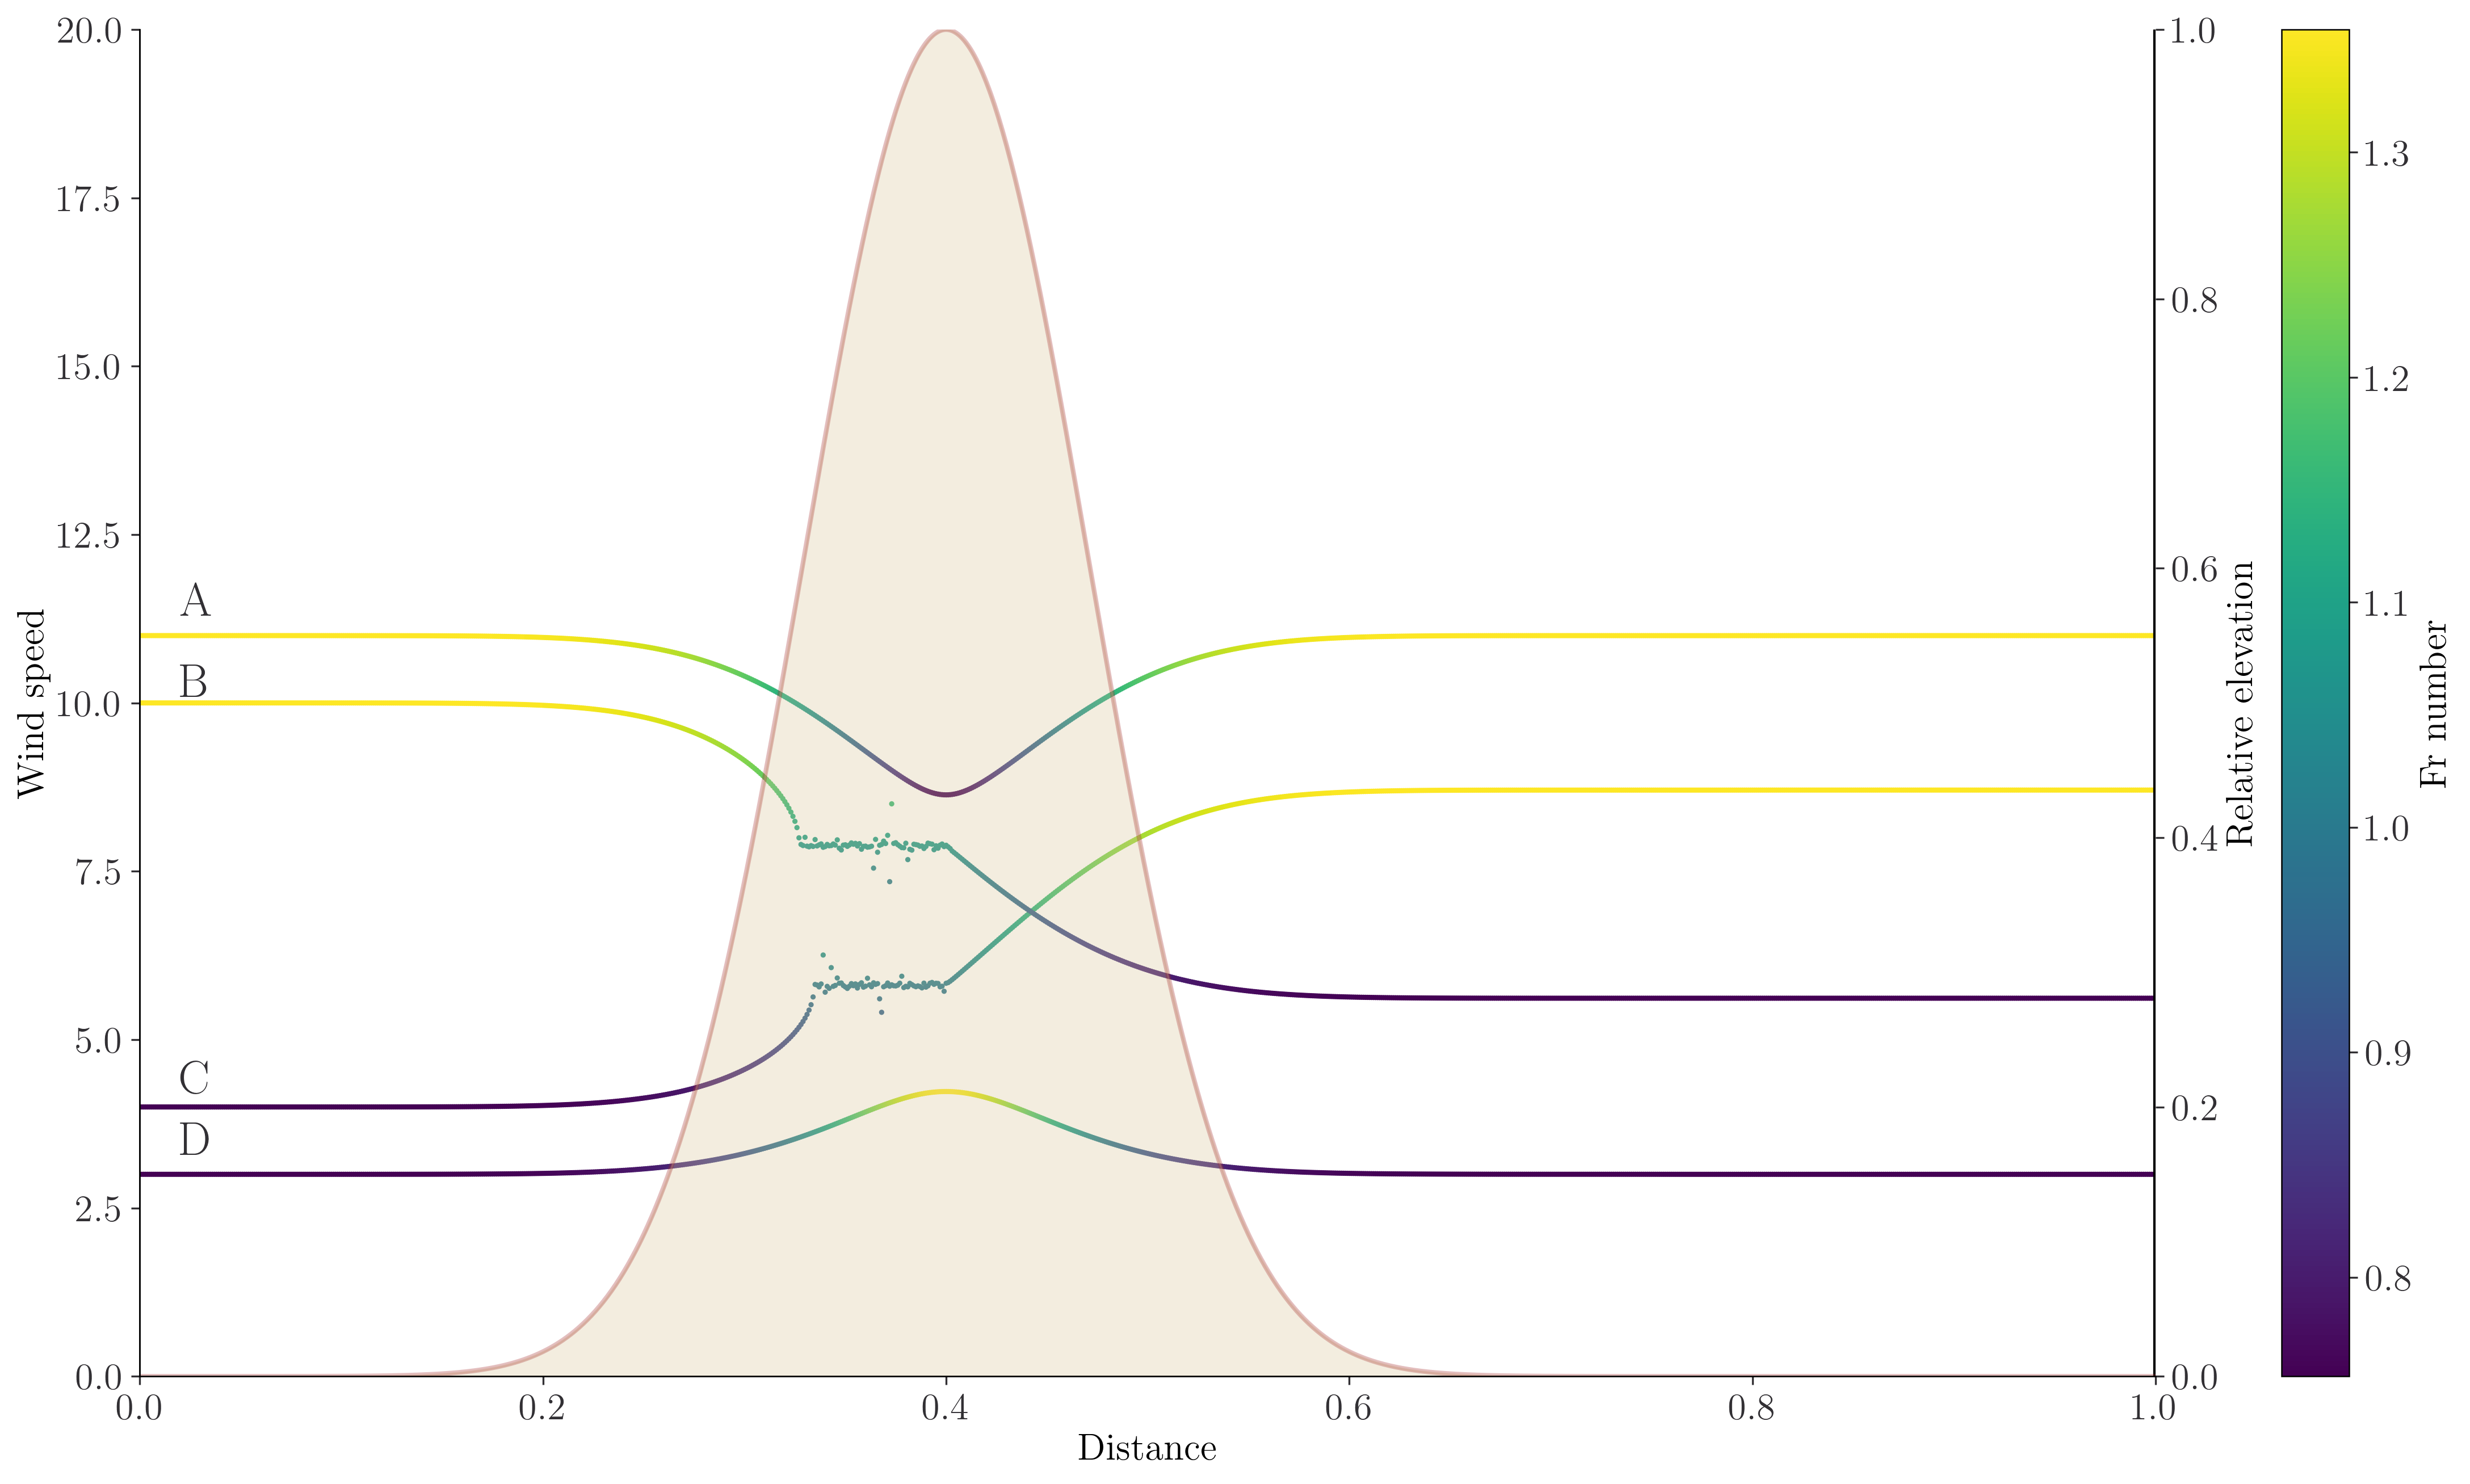

In [957]:
fig, ax1 = plt.subplots(figsize=(16,9))
ax2 = ax1.twinx()
ax1.set_xlim(0,1)
ax1.set_ylim(0,20)
ax2.set_ylim(0,1)
ax2.set_ylabel('Relative elevation', rotation = 90)
ax1.set_ylabel('Wind speed')
ax1.set_xlabel('Distance')
ax2.plot(res.t, h(res.t), color = 'brown', alpha = 0.3)
ax2.fill_between(np.arange(0, 1, 1e-3), y1 = [0]*1000, y2 = h(xs), color = (216/255,197/255,150/255), alpha = 0.3)

sc = []
for i in range(len(us)):
    sc.append(ax1.scatter(xs, us[i], s = 2, c = frs[i]))

    
ax1.text(0.02, 11.3, 'A', size = 20)
ax1.text(0.02, 10.1, 'B', size = 20)
ax1.text(0.02, 4.2, 'C', size = 20)
ax1.text(0.02, 3.3, 'D', size = 20)

plt.colorbar(sc[1], label = 'Fr number')
plt.vlines(1, 0, 20, color = 'black')
plt.tight_layout()